# Project: TMDB-Movies Dataset Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

[TMDB-Movies](https://www.themoviedb.org/) is The movie database(TMDb). This database is community built movies and TV database. In this database have many movies and features, but I use following properties:

    * popularity
    * budget_adj
    * revenue_adj
    * keywords
    * genres
    * release_date
    
In this report, I explore the following questions:

    * How has the profitability of making films changed over time?
    * When do movies of each genre or keyword make the best profits?
    
Throughout my analysis film profitability and popularity will be dependent variables, while release date, budget, genres, and keywords will be independent variables.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
#plt.style.use('seaborn')

<a id='wrangling'></a>
## Data Wrangling
In data wrangling step, I want to collect some meaningful columns and change to useful data types.

* Remove unuseful columns
* Change `release_date` format to `datetime
* Split `genres` and `keywords` string by "|"
* Fill mean value in NaN or 0 data

### General Properties
First of all I want to what kind of data in this dataset. See some rows and described table.

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Remove unusefule columns
df2 = pd.DataFrame(df, columns = ['popularity', 'budget_adj', 'revenue_adj', 'keywords', 'genres', 'release_date', 'release_year', 'original_title'])
df2.keys()

Index(['popularity', 'budget_adj', 'revenue_adj', 'keywords', 'genres',
       'release_date', 'release_year', 'original_title'],
      dtype='object')

In [6]:
df3 = pd.DataFrame(df2)
print(df3['release_date'])
df3['release_date'] = pd.to_datetime(df2['release_date'])
print(df3['release_date'])
df3['release_date'] = df3.apply(lambda x: x['release_date'].replace(year = x['release_year']), axis = 1)
print(df3['release_date'])

0          6/9/15
1         5/13/15
2         3/18/15
3        12/15/15
4          4/1/15
           ...   
10861     6/15/66
10862    12/21/66
10863      1/1/66
10864     11/2/66
10865    11/15/66
Name: release_date, Length: 10866, dtype: object
0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10866, dtype: datetime64[ns]
0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10866, dtype: datetime64[ns]


In [7]:
# Split string data
df4 = pd.DataFrame(df3)

df4['keywords'] = df4['keywords'].str.split("|")
df4['genres'] = df4['genres'].str.split("|")

df2.head(3)

,popularity,budget_adj,revenue_adj,keywords,genres,release_date,release_year,original_title
0,32.985763,1.379999e+08,1.392446e+09,"[monster, dna, tyrannosaurus rex, velociraptor...","[Action, Adventure, Science Fiction, Thriller]",2015-06-09,2015,Jurassic World
1,28.419936,1.379999e+08,3.481613e+08,"[future, chase, post-apocalyptic, dystopia, au...","[Action, Adventure, Science Fiction, Thriller]",2015-05-13,2015,Mad Max: Fury Road
2,13.112507,1.012000e+08,2.716190e+08,"[based on novel, revolution, dystopia, sequel,...","[Adventure, Science Fiction, Thriller]",2015-03-18,2015,Insurgent


### Data Cleaning
Dataset have some null data, therefore I clean some columns. 

In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10866 non-null  float64       
 1   budget_adj      10866 non-null  float64       
 2   revenue_adj     10866 non-null  float64       
 3   keywords        9373 non-null   object        
 4   genres          10843 non-null  object        
 5   release_date    10866 non-null  datetime64[ns]
 6   release_year    10866 non-null  int64         
 7   original_title  10866 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 679.2+ KB


There are null data in `keywords` and `genres`. These columns cannot fill any estimated value(because these are string type), then I remove some rows which are included null data.

In [9]:
# remove null data
df5 = pd.DataFrame(df4)
df5.dropna(inplace = True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9368 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      9368 non-null   float64       
 1   budget_adj      9368 non-null   float64       
 2   revenue_adj     9368 non-null   float64       
 3   keywords        9368 non-null   object        
 4   genres          9368 non-null   object        
 5   release_date    9368 non-null   datetime64[ns]
 6   release_year    9368 non-null   int64         
 7   original_title  9368 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 658.7+ KB


19792714.769019295
58902514.47627916


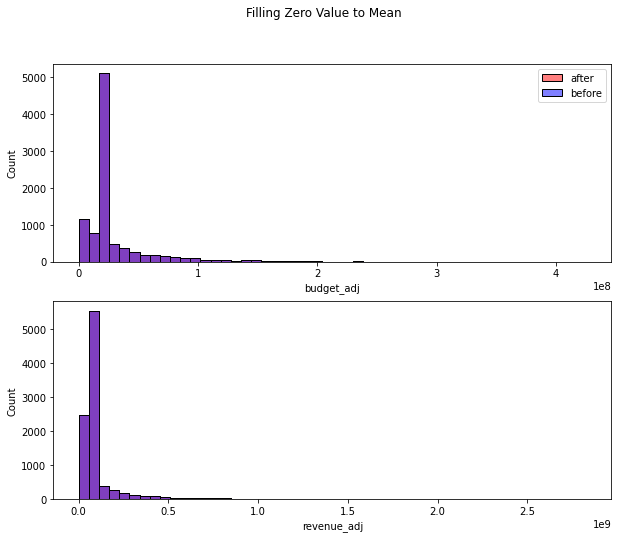

In [10]:
df6 = pd.DataFrame(df5)
print(df6['budget_adj'].mean())
print(df6['revenue_adj'].mean())

df6.loc[df6['budget_adj'] == 0, 'budget_adj'] = df6['budget_adj'].mean()
df6.loc[df6['revenue_adj'] == 0, 'revenue_adj'] = df6['revenue_adj'].mean()

fig, ax = plt.subplots(2,1,figsize = (10, 8))
sns.histplot(data = df6['budget_adj'], bins = 50, fill = True, ax = ax[0], alpha = 0.5, label = 'after', color = 'red')
sns.histplot(data = df5['budget_adj'], bins = 50, fill = True, ax = ax[0], alpha = 0.5, label = 'before', color = 'blue')
sns.histplot(data = df6['revenue_adj'], bins = 50, fill = True, ax = ax[1], alpha = 0.5, color = 'red')
sns.histplot(data = df5['revenue_adj'], bins = 50, fill = True, ax = ax[1], alpha = 0.5, color = 'blue')
ax[0].legend()
fig.suptitle('Filling Zero Value to Mean')
plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

### General(Compare every variable which can do.)

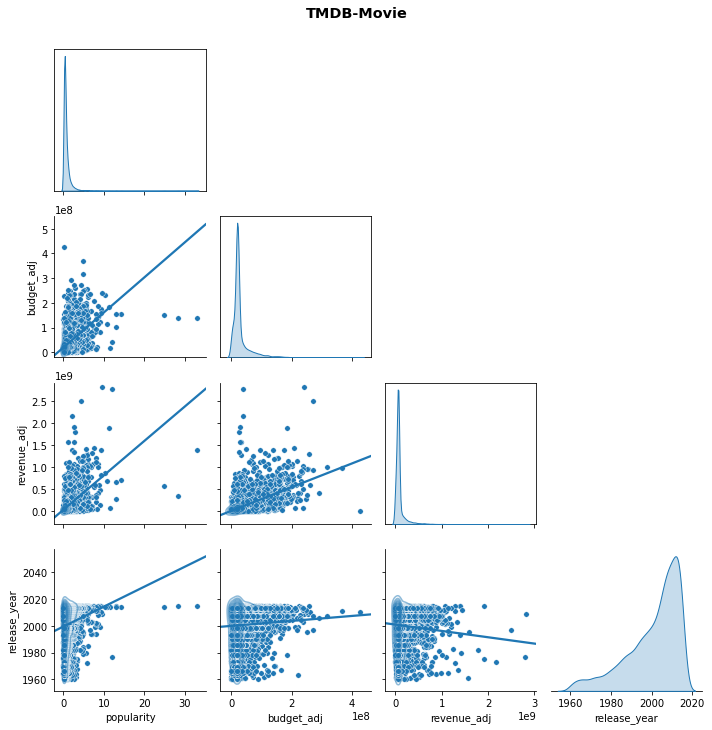

In [11]:
# ref: https://jehyunlee.github.io/2020/10/10/Python-DS-37-seaborn_matplotlib4/
g = sns.PairGrid(df6, diag_sharey = False, corner = True)

# diagonal
g.map_diag(sns.kdeplot, fill = True)
for i in range(3):
    g.axes[i][i].spines['left'].set_visible(True)
    g.axes[i][i].spines['top'].set_visible(True)
    g.axes[i][i].spines['right'].set_visible(True)
    
# lower
g.map_lower(sns.scatterplot, s = 30, edgecolor = 'w')
g.map_lower(sns.regplot, scatter = False, truncate = False, ci = False)
g.map_lower(sns.kdeplot, alpha = 0.5)

g.fig.suptitle("TMDB-Movie", y = 1.01, weight = "bold", fontsize = 'x-large')
g.fig.tight_layout()
plt.show()

* Popularity has positive correlation budget and revenue!
    - popular movie make many money
    - and spend lots of money
* If the movie company want to make lots of money, then they must spend lots of money!

D:\Sangwons_Room\00_SoftWares\Anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


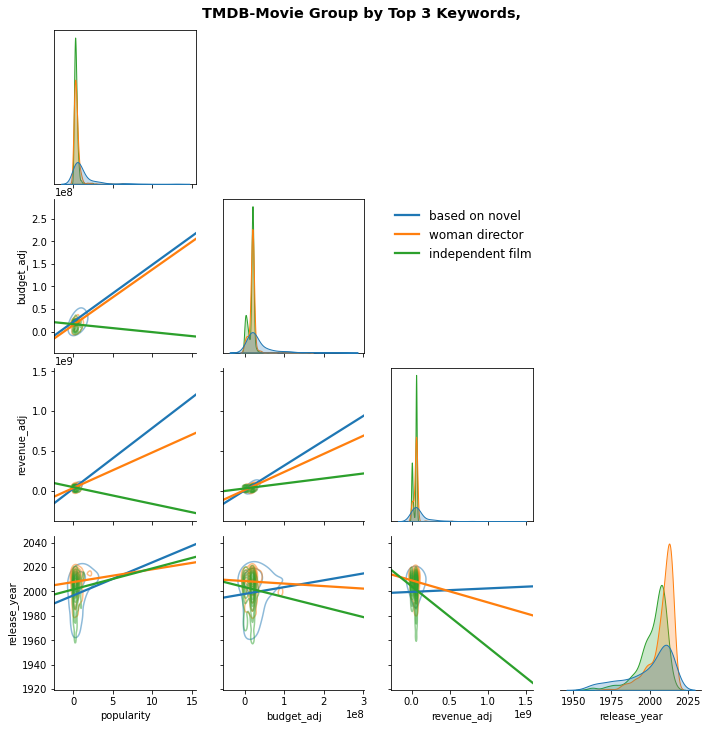

In [12]:
pick_keywords = df6.explode('keywords')['keywords'].value_counts().head(3).keys()

g = sns.PairGrid(df6.explode('keywords').query('keywords in {}'.format(list(pick_keywords))), hue = 'keywords', diag_sharey = False, corner = True)

# diagonal
g.map_diag(sns.kdeplot, fill = True)
for i in range(3):
    g.axes[i][i].spines['left'].set_visible(True)
    g.axes[i][i].spines['top'].set_visible(True)
    g.axes[i][i].spines['right'].set_visible(True)
    
# lower
# g.map_lower(sns.scatterplot, s = 30, edgecolor = 'w')
g.map_lower(sns.regplot, scatter = False, truncate = False, ci = False)
g.map_lower(sns.kdeplot, alpha = 0.5)

handles = g._legend_data.values()
labels = g._legend_data.keys()

# Insert legend
g.axes[1][0].legend(handles=handles, labels=labels,
                    bbox_to_anchor=(3.45, 1),
                    fontsize="large", frameon=False
                   )

g.fig.suptitle("TMDB-Movie Group by Top 3 Keywords, ", y = 1.01, weight = "bold", fontsize = 'x-large')
g.fig.tight_layout()
plt.show()

* Independent films can't make money, but you don't even have to spend money
* The movies, which is based on novel, are very efficient(these are the highest revenue per budget on investment.)
* Films directed by women have the highest profits compared to their popularity.

D:\Sangwons_Room\00_SoftWares\Anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


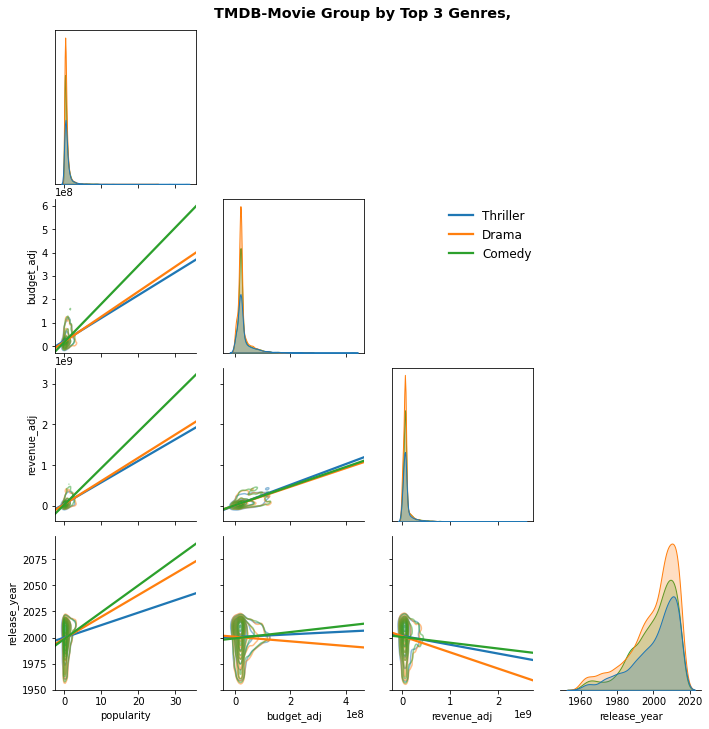

In [13]:
pick_genres = df6.explode('genres')['genres'].value_counts().head(3).keys()

g = sns.PairGrid(df6.explode('genres').query('genres in {}'.format(list(pick_genres))), hue = 'genres', diag_sharey = False, corner = True)

# diagonal
g.map_diag(sns.kdeplot, fill = True)
for i in range(3):
    g.axes[i][i].spines['left'].set_visible(True)
    g.axes[i][i].spines['top'].set_visible(True)
    g.axes[i][i].spines['right'].set_visible(True)
    
# lower
# g.map_lower(sns.scatterplot, s = 30, edgecolor = 'w')
g.map_lower(sns.regplot, scatter = False, truncate = False, ci = False)
g.map_lower(sns.kdeplot, alpha = 0.5)

handles = g._legend_data.values()
labels = g._legend_data.keys()

# Insert legend
g.axes[1][0].legend(handles=handles, labels=labels,
                    bbox_to_anchor=(3.45, 1),
                    fontsize="large", frameon=False
                   )

g.fig.suptitle("TMDB-Movie Group by Top 3 Genres, ", y = 1.01, weight = "bold", fontsize = 'x-large')
g.fig.tight_layout()
plt.show()

* The revenue compared to the budget for each genres is similar

### Research Question 1: How has the profitability of making films changed over time?

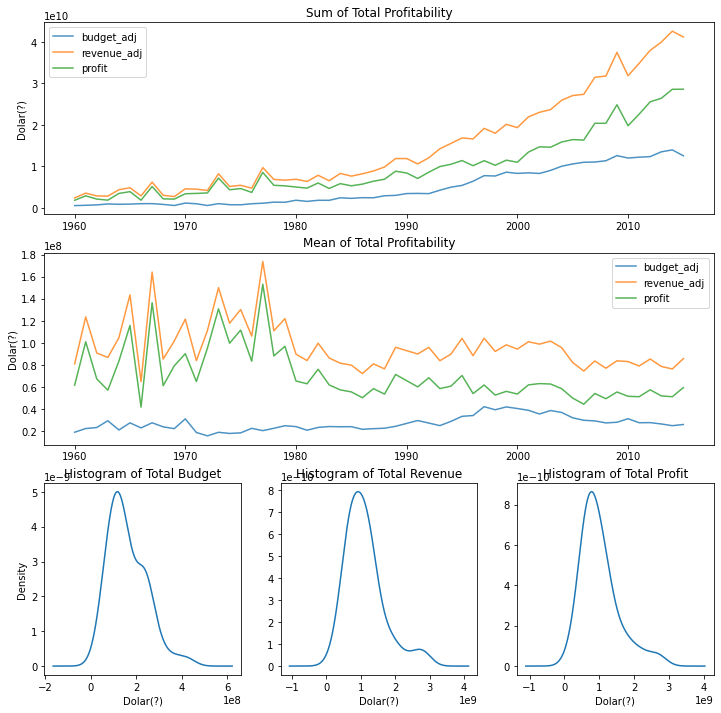

In [14]:
df7 = pd.DataFrame(df6)
df7 = df7.sort_values(by = 'release_date')
df7['profit'] = df7['revenue_adj'] - df7['budget_adj']

fig = plt.figure(figsize = (12, 12))
spec = fig.add_gridspec(3, 3)

ax = {}
ax[0] = fig.add_subplot(spec[0,:])
ax[1] = fig.add_subplot(spec[1,:])
ax[2] = fig.add_subplot(spec[2,0])
ax[3] = fig.add_subplot(spec[2,1])
ax[4] = fig.add_subplot(spec[2,2])

    
df7.groupby('release_year').sum()[['budget_adj', 'revenue_adj', 'profit']].plot(kind = 'line', alpha = 0.8, ax = ax[0])
df7.groupby('release_year').mean()[['budget_adj', 'revenue_adj', 'profit']].plot(kind = 'line', alpha = 0.8, ax = ax[1])
df7.groupby('release_year').max()['budget_adj'].plot(kind = 'kde', alpha = 1, ax = ax[2])
df7.groupby('release_year').max()['revenue_adj'].plot(kind = 'kde', alpha = 1, ax = ax[3])
df7.groupby('release_year').max()['profit'].plot(kind = 'kde', alpha = 1, ax = ax[4])

ax[0].set_title('Sum of Total Profitability')
ax[1].set_title('Mean of Total Profitability')
ax[2].set_title('Histogram of Total Budget')
ax[3].set_title('Histogram of Total Revenue')
ax[4].set_title('Histogram of Total Profit')
ax[0].set_ylabel('Dolar(?)')
ax[1].set_ylabel('Dolar(?)')

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("Dolar(?)")
ax[3].set_xlabel("Dolar(?)")
ax[4].set_xlabel("Dolar(?)")
ax[3].set_ylabel("")
ax[4].set_ylabel("")

plt.show()

* Movie industries are increasing since 1960s
* Mean of budget, revenue, and profit is barely increase
* Most movie budgets, revenues, and profits are as low as around $1e8.

### Research Question 2: When do movies of each genre or keyword make the best profits?

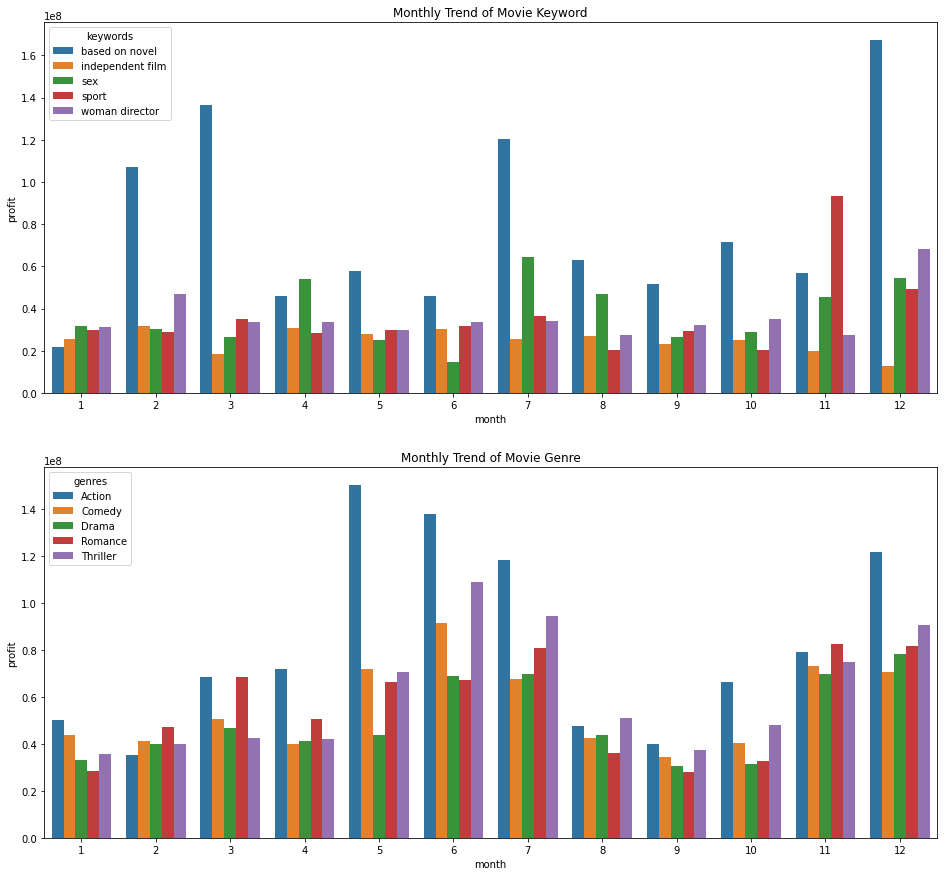

In [15]:
df8 = pd.DataFrame(df7)
pick_keywords = df8.explode('keywords')['keywords'].value_counts().head(5).keys()
pick_genres = df8.explode('genres')['genres'].value_counts().head(5).keys()

df8['month'] = df8['release_date'].dt.month
df_k = df8.explode('keywords')
df_k = df_k.query('keywords in {}'.format(list(pick_keywords)))
df_g = df8.explode('genres')
df_g = df_g.query('genres in {}'.format(list(pick_genres)))

fig, ax = plt.subplots(2,1,figsize = (16, 15))
sns.barplot(x = 'month', y = 'profit', data = df_k.groupby(['month', 'keywords']).mean().reset_index(), hue = 'keywords', ax = ax[0])
sns.barplot(x = 'month', y = 'profit', data = df_g.groupby(['month', 'genres']).mean().reset_index(), hue = 'genres', ax = ax[1])

ax[0].set_title('Monthly Trend of Movie Keyword')
ax[1].set_title('Monthly Trend of Movie Genre')

plt.show()

* Films based on novels have high profits in February, March, July, and December.
* Sports movies generate the most profits in November.
* For the rest of the movies, there is no clear change from month to month.

* Action movies make the biggest profit in May
* Thriller movies make the biggest profit in June

<a id='conclusions'></a>
## Conclusion

In the EDA section, I want to see how much a movie's genre or keyword influences the movie's revenue or profit. First, I check correlation of all variables of interest. It is confirmed that the keyword or genre of the movie influenced the correlation of each variable. Second, I want to answer the first question, "How has the profitability of making films changed over time?". Most of the movies barely increase profits, but a handful of movies made huge amounts of money, and the amount is growing. Third, these keyword and genre are influenced by month? That is my question2, "When do movies of each genre or keyword make the best profits?". I can show you monthly trend of movies profit by keywords and genres. For some genres or keywords, monthly trends aren't clearly visible. Among the keywords, however, novel-based movies make remarkable profits in February, March, July and December, and sports keyword movies showed strong performance in November. In the genre of each movie, action make a lot of money in May, June, 7, and November, and the thriller genre show a strong tendency to profit in June and July.

### Limitations
Most of the data is not a lot of null data left after deleting unnecessary data. However, budget and revenue often include "0"(that is not null or nan), which have a big impact on the analysis results. In this analysis, the "0" value is simply corrected through the average of the whole value, but if the actual value cannot be found, an estimate value considering the director, genre, actor, etc. is needed. In addition, in order to infer a level that can be analyzed because there are a large amount of keywords or genres of movies, the analysis is conducted by simply selecting the five with the largest number of keywords or genres. For reliable analysis, analysis on each keyword and genre should be preceded.

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1